# Sampling

### Import necessary libraries and dataset

In [136]:
import pandas as pd
import numpy as np
url = "https://raw.githubusercontent.com/AnjulaMehto/Sampling_Assignment/main/Creditcard_data.csv"
df = pd.read_csv(url)

In [137]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
767,575,-0.572263,0.731748,1.541254,0.150506,1.108974,0.372152,1.084879,-0.146329,-0.274447,...,-0.143508,-0.107582,-0.418263,-0.731029,0.877525,-0.364150,-0.177509,-0.256545,26.72,0
768,579,-1.296845,-0.511605,2.404726,-0.310762,-0.319551,-0.542842,-0.173310,0.260423,-1.202688,...,-0.071270,-0.161175,0.088496,0.285390,0.281069,-0.370130,0.043410,0.092318,80.00,0
769,579,1.214170,0.210481,0.484651,0.479768,-0.261955,-0.527039,0.021782,-0.106888,-0.037631,...,-0.224292,-0.594609,0.159877,0.091873,0.140964,0.227406,-0.017389,0.016030,5.98,0
770,580,1.267030,-0.071114,0.037680,0.512683,0.242392,0.705212,-0.226582,0.109483,0.657565,...,-0.164468,-0.177225,-0.222918,-1.245505,0.678360,0.525059,0.002920,-0.003333,12.36,0


### Check if dataset is balanced or not

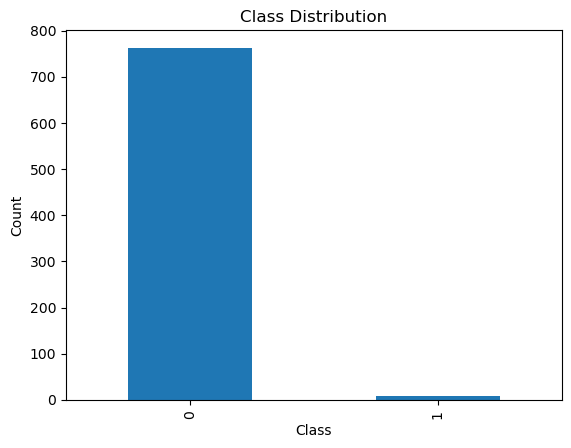

In [139]:
import matplotlib.pyplot as plt

df['Class'].value_counts().plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


Since the data provided is not balanced, we will perform the following two sampling operations to balance it:
1) Undersampling
2) Oversampling

## UnderSampling:

Class distribution before undersampling:
Class
0    763
1      9
Name: count, dtype: int64

Class distribution after undersampling:
Class
0    9
1    9
Name: count, dtype: int64


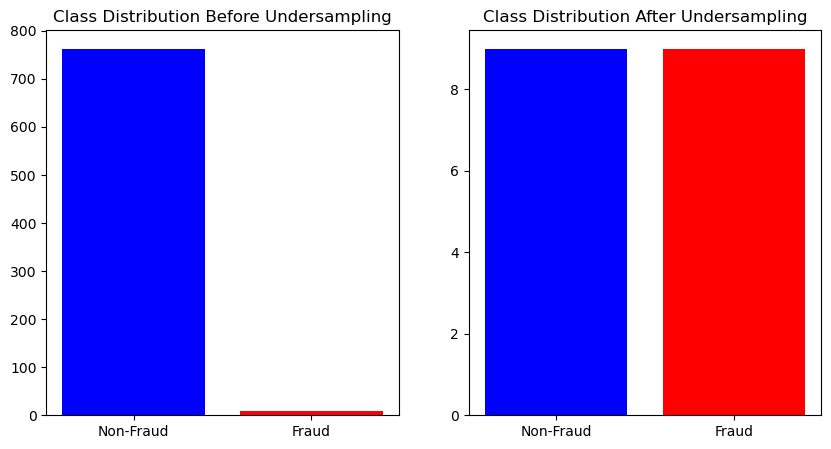

In [140]:
# Display class distribution before undersampling
before_distribution = df['Class'].value_counts()
print("Class distribution before undersampling:")
print(before_distribution)

# Separate the majority and minority classes
majority_class = df[df['Class'] == 0]
minority_class = df[df['Class'] == 1]

# Undersample the majority class randomly
undersampled_majority = majority_class.sample(n=len(minority_class), random_state=42)

# Concatenate the undersampled majority class with the minority class
balanced_df = pd.concat([undersampled_majority, minority_class])

# Shuffle the rows of the balanced dataset
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Display class distribution after undersampling
after_distribution = balanced_df['Class'].value_counts()
print("\nClass distribution after undersampling:")
print(after_distribution)

# Plotting bar graphs
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Bar graph before undersampling
ax[0].bar(before_distribution.index, before_distribution.values, color=['blue', 'red'])
ax[0].set_title('Class Distribution Before Undersampling')
ax[0].set_xticks([0, 1])
ax[0].set_xticklabels(['Non-Fraud', 'Fraud'])

# Bar graph after undersampling
ax[1].bar(after_distribution.index, after_distribution.values, color=['blue', 'red'])
ax[1].set_title('Class Distribution After Undersampling')
ax[1].set_xticks([0, 1])
ax[1].set_xticklabels(['Non-Fraud', 'Fraud'])

plt.show()

In [141]:
balanced_df.shape

(18, 31)

## OverSampling:


Class distribution after oversampling:
Class
1    763
0    763
Name: count, dtype: int64


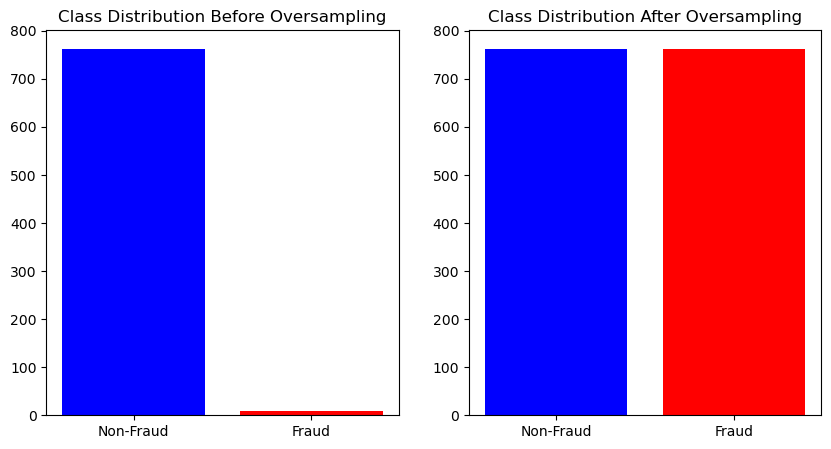

In [142]:
# Oversample the minority class randomly
oversampled_minority = minority_class.sample(n=len(majority_class), replace=True, random_state=42)

# Concatenate the oversampled minority class with the majority class
balanced_df = pd.concat([majority_class, oversampled_minority])

# Shuffle the rows of the balanced dataset
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Display class distribution after oversampling
after_distribution = balanced_df['Class'].value_counts()
print("\nClass distribution after oversampling:")
print(after_distribution)

# Plotting bar graphs
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Bar graph before oversampling
ax[0].bar(before_distribution.index, before_distribution.values, color=['blue', 'red'])
ax[0].set_title('Class Distribution Before Oversampling')
ax[0].set_xticks([0, 1])
ax[0].set_xticklabels(['Non-Fraud', 'Fraud'])

# Bar graph after oversampling
ax[1].bar(after_distribution.index, after_distribution.values, color=['red', 'blue'])
ax[1].set_title('Class Distribution After Oversampling')
ax[1].set_xticks([0, 1])
ax[1].set_xticklabels(['Non-Fraud', 'Fraud'])

plt.show()

In [143]:
balanced_df.shape

(1526, 31)

As we can see that no data is lost in later,we will use oversampling to balance our dataset


### Sampling

Now we will make 5 samples of the given data using different sampling techniques:

In [145]:
#Making 5 samples

In [146]:
# Specify parameters for  sampling
Z = 1.96  # Z-score for 95% confidence level
p = 0.5  # Estimated proportion (assuming 50%)
E = 0.05  # Desired margin of error
C = 0.95  # #confidence value
c = 100  # Average cluster size (assuming 100)


In [147]:

#Sample1: Simple Random Sampling
#size of sample
n1=round(((Z**2)*p*(1-p))/(E**2))
print("rounded value of size of sample 1:",n1)

#Generate sample
Sample1 = balanced_df.sample(n=n1, random_state=42)

rounded value of size of sample 1: 384


In [148]:
Sample1

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
1439,164,0.073497,0.551033,0.451890,0.114964,0.822947,0.251480,0.296319,0.139497,-0.123050,...,-0.128758,-0.381932,0.151012,-1.363967,-1.389079,0.075412,0.231750,0.230171,0.99,1
76,574,1.257719,0.364739,0.306923,0.690638,-0.357792,-1.067481,0.094272,-0.210300,0.014455,...,-0.286856,-0.820658,0.127663,0.343128,0.221120,0.094391,-0.022189,0.030944,1.29,1
1010,346,1.077079,0.284980,0.007731,1.657073,0.052020,0.446389,-0.407036,0.355704,0.626039,...,-0.174337,-0.174161,-0.153375,-0.466331,0.611001,-0.252871,0.090375,0.054820,10.99,0
660,517,-0.639474,-0.048355,2.452755,0.310804,-0.430963,-0.290032,0.166889,0.006196,0.651675,...,0.004189,0.110847,0.057008,0.389171,-0.449642,0.218186,-0.067664,-0.073760,59.90,0
1132,487,-0.517981,0.723072,1.401196,0.772313,0.671651,0.847780,0.352294,0.224071,-2.314242,...,-0.374926,-0.737659,-0.391401,-1.420024,0.435491,0.192061,0.051327,0.052402,7.48,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1481,574,1.257719,0.364739,0.306923,0.690638,-0.357792,-1.067481,0.094272,-0.210300,0.014455,...,-0.286856,-0.820658,0.127663,0.343128,0.221120,0.094391,-0.022189,0.030944,1.29,1
756,327,1.162687,0.269139,0.163258,0.943088,-0.003225,-0.421822,0.213395,-0.125542,-0.396783,...,0.087745,0.236577,-0.191415,0.042338,0.720315,-0.332043,0.009356,0.014457,36.71,0
1074,164,0.073497,0.551033,0.451890,0.114964,0.822947,0.251480,0.296319,0.139497,-0.123050,...,-0.128758,-0.381932,0.151012,-1.363967,-1.389079,0.075412,0.231750,0.230171,0.99,1
867,574,1.257719,0.364739,0.306923,0.690638,-0.357792,-1.067481,0.094272,-0.210300,0.014455,...,-0.286856,-0.820658,0.127663,0.343128,0.221120,0.094391,-0.022189,0.030944,1.29,1


In [171]:
#Sample2 - Statified Sampling

#generate samples
strata1=balanced_df[balanced_df['Class']==0]
strata2=balanced_df[balanced_df['Class']==1]

n11=round(((Z**2)*p*(1-p))/(E**2))
print("sample size from each strata:",n11)

sample_11 = strata1.sample(n=n11, random_state=42)
sample_12 = strata2.sample(n=n11, random_state=42)

#combine the samples
Sample2 = pd.concat([sample_11, sample_12], axis=0)

sample size from each strata: 384


In [172]:
Sample2

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,cluster
713,459,-0.528218,0.981232,1.652988,-0.150715,0.137048,-0.203980,0.583370,0.165246,-0.781696,...,-0.272731,0.023887,0.223936,-0.297777,0.068300,0.281018,0.111557,6.99,0,2
526,354,-0.687099,0.790436,2.242424,2.406462,0.359712,0.279410,0.103677,0.399071,-1.518733,...,-0.702303,0.088038,0.138006,-0.129553,-0.141250,-0.011386,-0.006344,11.38,0,1
1490,379,-1.896099,-1.829046,1.181222,3.897846,-1.686469,1.976371,-0.564107,-2.400465,-0.979202,...,-0.516626,-0.911682,0.025106,0.656699,0.200868,-0.088994,0.339814,881.13,0,4
414,351,1.205444,0.008467,0.953782,1.141093,-0.491215,0.297303,-0.503913,0.084948,0.796497,...,-0.046173,-0.123765,-0.430029,0.559222,-0.360379,0.077359,0.032499,12.99,0,1
670,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1144,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1,3
1335,484,-0.928088,0.398194,1.741131,0.182673,0.966387,-0.901004,0.879016,-0.156590,-0.142117,...,0.281378,-0.257966,0.385384,0.391117,-0.453853,-0.104448,-0.125765,1.00,1,4
331,484,-0.928088,0.398194,1.741131,0.182673,0.966387,-0.901004,0.879016,-0.156590,-0.142117,...,0.281378,-0.257966,0.385384,0.391117,-0.453853,-0.104448,-0.125765,1.00,1,1
599,574,1.257719,0.364739,0.306923,0.690638,-0.357792,-1.067481,0.094272,-0.210300,0.014455,...,-0.820658,0.127663,0.343128,0.221120,0.094391,-0.022189,0.030944,1.29,1,1


In [173]:
#Sample3:Cluster Sampling
#let's make 5 clusters
import random as rd



def sample_cluster(dataframe, clusters, state=None):
    print('define variables')
    length = len(dataframe)
    print(f'  - length: {length}')
    element_max = length / clusters
    print(f'  - elements by cluster: {element_max}')
    
    cluster_list = []
    cluster_id = 0
    element_count = 0
    
    print('define clusters')
    for _ in dataframe.iterrows():
        cluster_list.append(cluster_id)
        element_count += 1
        if element_count > (element_max - 1):
            element_count = 0
            cluster_id += 1
    
    dataframe['cluster'] = cluster_list
    print(' - cluster list')
    print(dataframe['cluster'].value_counts())
    print('')
    rd.seed(state)
    cluster_selected = rd.randint(0, clusters - 1)
    print('cluster selected:', cluster_selected)
    
    # Ensure that the final sample contains instances of both class 0 and class 1
    class_0_sample = dataframe[dataframe['cluster'] == cluster_selected].sample(frac=0.5, random_state=state)
    class_1_sample = dataframe[dataframe['cluster'] != cluster_selected].sample(frac=0.5, random_state=state)
    
    dataframe_clustered = pd.concat([class_0_sample, class_1_sample])
    
    dataframe_clustered = dataframe_clustered.drop('cluster', axis=1)
    
    print('cluster size:', dataframe_clustered.shape[0], '\n')
    return dataframe_clustered


Sample3=sample_cluster(balanced_df,5)

define variables
  - length: 1526
  - elements by cluster: 305.2
define clusters
 - cluster list
cluster
0    305
1    305
2    305
3    305
4    305
5      1
Name: count, dtype: int64

cluster selected: 2
cluster size: 762 



In [174]:
Sample3

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
794,325,1.409186,-0.383686,0.256252,-0.703150,-0.763574,-0.732257,-0.350658,-0.285738,-1.032103,...,-0.498190,-0.918542,0.055548,-0.067339,0.208495,0.929543,-0.047751,0.010905,17.24,0
824,472,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
865,529,-2.000567,-2.495484,2.467149,1.140053,2.462010,0.594262,-2.110183,0.788347,0.958809,...,0.422452,1.195394,0.297836,-0.857105,-0.219322,0.861019,-0.124622,-0.171060,1.50,1
771,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1
698,77,-0.427191,0.745708,1.761811,-0.165130,0.058298,-0.213413,0.647323,0.073464,-0.291864,...,-0.201681,-0.432070,0.013164,0.161606,-0.401310,0.047423,0.102549,-0.116571,9.12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20,312,-0.719402,-0.124184,1.979309,0.503415,-0.732324,0.394883,0.280296,0.118478,-1.445666,...,-0.170480,-0.125550,0.203485,0.041484,-0.026663,-0.232425,0.134531,0.133484,140.60,0
44,260,1.075229,-0.335339,1.680468,1.192098,-1.270531,0.313498,-0.871025,0.235402,1.315261,...,0.092930,0.815227,-0.054551,0.731149,0.431465,0.580189,0.062528,0.025628,5.46,0
923,284,1.141436,0.081893,0.503625,1.487212,-0.473170,-0.411384,-0.053193,0.071036,0.553486,...,-0.102341,-0.150234,0.001322,0.369459,0.556295,-0.326645,0.028101,0.015215,7.89,0
545,574,1.257719,0.364739,0.306923,0.690638,-0.357792,-1.067481,0.094272,-0.210300,0.014455,...,-0.286856,-0.820658,0.127663,0.343128,0.221120,0.094391,-0.022189,0.030944,1.29,1


In [175]:
#Sample4:Systematic Sampling

#size of sample
n2=round(((Z**2)*p*(1-p))/(E**2))
print("rounded value of size of sample 2:",n2)

#intervals
k = ps // n1
print("Interval size:",k)

#Generate sample
Sample4 = df.iloc[0::k]

rounded value of size of sample 2: 384
Interval size: 3


In [176]:
Sample4

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
6,4,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
9,9,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0
12,10,1.249999,-1.221637,0.383930,-1.234899,-1.485419,-0.753230,-0.689405,-0.227487,-2.094011,...,-0.231809,-0.483285,0.084668,0.392831,0.161135,-0.354990,0.026416,0.042422,121.50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759,571,-2.990622,2.962638,-0.980844,0.071904,-1.795238,-1.335733,-1.143681,2.134599,-0.377240,...,-0.184759,-0.890628,0.278109,0.301391,0.137764,0.103233,0.052097,0.001938,9.99,0
762,572,1.063195,-1.156247,-0.814094,-0.462132,1.137835,3.909057,-1.116745,0.920514,-0.600150,...,-0.205083,-0.434832,-0.220055,0.991996,0.631624,-0.223179,0.052542,0.053525,158.00,0
765,574,1.178364,0.444453,-0.398723,0.724486,0.123439,-0.753883,0.161412,0.004017,-0.306011,...,-0.055267,-0.147937,-0.026551,0.113747,0.412081,0.371214,-0.026679,0.023272,0.76,0
768,579,-1.296845,-0.511605,2.404726,-0.310762,-0.319551,-0.542842,-0.173310,0.260423,-1.202688,...,-0.071270,-0.161175,0.088496,0.285390,0.281069,-0.370130,0.043410,0.092318,80.00,0


In [177]:
#Sample5: Bootstrap sampling:
#size of sample
ns=round(((Z**2)*p*(1-p))/(E**2))
print("sample size:",ns)

#Generate sample
Sample5=balanced_df.iloc[np.random.randint(ps, size=ns)]

sample size: 384


In [178]:
Sample5

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,cluster
1357,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1,4
810,317,1.384146,-0.729477,0.562339,-0.901506,-0.831961,0.299020,-1.086901,0.111688,-0.391830,...,1.020045,-0.204474,-0.843692,0.492947,0.038608,0.053718,0.014774,19.99,0,2
665,118,1.254914,0.350287,0.302488,0.693114,-0.371470,-1.070256,0.086781,-0.202836,0.035154,...,-0.832682,0.128083,0.339427,0.215944,0.094704,-0.023354,0.030892,2.69,1,2
89,164,0.073497,0.551033,0.451890,0.114964,0.822947,0.251480,0.296319,0.139497,-0.123050,...,-0.381932,0.151012,-1.363967,-1.389079,0.075412,0.231750,0.230171,0.99,1,0
1357,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677,143,-2.143458,2.107826,0.213152,1.282217,-0.732558,0.023589,-0.073256,0.924143,-0.356988,...,0.345346,0.013233,0.117188,0.012406,-0.288531,-0.473894,-0.184488,39.95,0,2
398,309,1.239526,0.602892,-0.257987,1.319581,-0.050805,-1.216528,0.235434,-0.192577,0.056127,...,-0.153895,-0.108973,0.246565,0.661412,-0.324202,0.025960,0.049254,1.00,0,1
220,403,1.085214,-0.228464,0.774503,1.379282,-0.469900,0.765731,-0.589284,0.426976,0.865987,...,0.049995,-0.111814,-0.319642,0.574092,-0.250482,0.057517,0.006986,15.00,0,0
181,34,-0.762256,0.127768,2.650056,-1.875663,-0.893356,-0.268715,-0.419864,0.146233,-0.869635,...,1.260403,-0.404700,0.094946,0.480976,-0.090685,0.319223,0.135600,15.99,0,0


After sampling, we will apply different models on the samples and find their accuracy.

### Applying different Models on samples:

#### Model 1: Logistic Regression for Sample 1

In [181]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

def logistic_regression(sample):
    
    X=sample.drop('Class',axis=1)
    y=sample['Class']

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Standardize the features 
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Create a Logistic Regression model
    logreg_model = LogisticRegression()

    # Train the model
    logreg_model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = logreg_model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    
    # Print the results
    print(f"Logistic Regression Accuracy: {accuracy}")

    # return the results
    return accuracy

print(logistic_regression(Sample1))

Logistic Regression Accuracy: 0.922077922077922
0.922077922077922


#### Model 2: SVM for Sample 2

In [183]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

def svm_classification(sample):
    
    X = sample.drop('Class', axis=1)
    y = sample['Class']

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create a Support Vector Machine (SVM) model
    svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)

    # Train the model
    svm_model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = svm_model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)

    # Print the results
    print(f"SVM Accuracy: {accuracy}")

    # Return the accuracy
    return accuracy


result = svm_classification(Sample2)
print(result)


SVM Accuracy: 0.7142857142857143
0.7142857142857143


#### Model 3: Decision Tree for Sample 3

In [185]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

def decision_tree_classification(sample):
    
    X = sample.drop('Class', axis=1)
    y = sample['Class']

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create a Decision Tree model
    decision_tree_model = DecisionTreeClassifier(random_state=42)

    # Train the model
    decision_tree_model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = decision_tree_model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)

    # Print the results
    print(f"Decision Tree Accuracy: {accuracy}")

    # Return the accuracy
    return accuracy


result = decision_tree_classification(Sample3)
print(result)


Decision Tree Accuracy: 1.0
1.0


#### Model 4: Naive Bayes for Sample 4

In [187]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

def naive_bayes_classification(sample):
    
    X = sample.drop('Class', axis=1)
    y = sample['Class']

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create a Gaussian Naive Bayes model
    naive_bayes_model = GaussianNB()

    # Train the model
    naive_bayes_model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = naive_bayes_model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)

    # Print the results
    print(f"Naive Bayes Accuracy: {accuracy}")

    # Return the accuracy
    return accuracy


result = naive_bayes_classification(Sample4)
print(result)


Naive Bayes Accuracy: 1.0
1.0


#### Model 5: Random Forest for Sample 5

In [189]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

def random_forest_classification(sample):
    
    X = sample.drop('Class', axis=1)
    y = sample['Class']

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create a Random Forest model
    random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)

    # Train the model
    random_forest_model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = random_forest_model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)

    # Print the results
    print(f"Random Forest Accuracy: {accuracy}")

    # Return the accuracy
    return accuracy


result = random_forest_classification(Sample5)
print(result)


Random Forest Accuracy: 1.0
1.0


### Making Table

We will make table according to accuracy of each model on each sample.

In [191]:
samples = ['Sample1', 'Sample2', 'Sample3', 'Sample4', 'Sample5']

# List of model functions
models = [logistic_regression,svm_classification, decision_tree_classification, naive_bayes_classification,random_forest_classification]

# Create a dictionary to store accuracies
acc = {'Sample': samples}

# Populate the dictionary with accuracies for each model and sample
for model_func in models:
    model_name = model_func.__name__
    accuracies = [model_func(sample) for sample in [Sample1, Sample2, Sample3, Sample4, Sample5]]
    acc[model_name] = accuracies

# Create a DataFrame from the dictionary
model_df = pd.DataFrame(acc)


Logistic Regression Accuracy: 0.922077922077922
Logistic Regression Accuracy: 0.8831168831168831
Logistic Regression Accuracy: 0.9084967320261438
Logistic Regression Accuracy: 1.0
Logistic Regression Accuracy: 0.9090909090909091
SVM Accuracy: 0.7012987012987013
SVM Accuracy: 0.7142857142857143
SVM Accuracy: 0.7124183006535948
SVM Accuracy: 1.0
SVM Accuracy: 0.7272727272727273
Decision Tree Accuracy: 0.935064935064935
Decision Tree Accuracy: 0.9805194805194806
Decision Tree Accuracy: 1.0
Decision Tree Accuracy: 1.0
Decision Tree Accuracy: 0.974025974025974
Naive Bayes Accuracy: 0.7402597402597403
Naive Bayes Accuracy: 0.577922077922078
Naive Bayes Accuracy: 0.7124183006535948
Naive Bayes Accuracy: 1.0
Naive Bayes Accuracy: 0.8311688311688312
Random Forest Accuracy: 1.0
Random Forest Accuracy: 1.0
Random Forest Accuracy: 1.0
Random Forest Accuracy: 1.0
Random Forest Accuracy: 1.0


In [192]:
model_df

,Sample,logistic_regression,svm_classification,decision_tree_classification,naive_bayes_classification,random_forest_classification
0,Sample1,0.922078,0.701299,0.935065,0.740260,1.0
1,Sample2,0.883117,0.714286,0.980519,0.577922,1.0
2,Sample3,0.908497,0.712418,1.000000,0.712418,1.0
3,Sample4,1.000000,1.000000,1.000000,1.000000,1.0
4,Sample5,0.909091,0.727273,0.974026,0.831169,1.0


We conducted an analysis wherein various models were applied to distinct samples, and subsequently, the accuracies for each model-sample combination were recorded and organized in a tabular format.